# Setup

In [ ]:
! apt install pipx

[sudo] password for konhis: 

In [1]:
# !jupyter nbextension install --user --py widgetsnbextension
# !jupyter nbextension enable widgetsnbextension --user --py

In [2]:
!jupyter nbextension enable widgetsnbextension --user --py

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [1]:
!pip install jupyter-nbextension

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.11/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [23]:
# !~/Documents/Jupyter_notebooks/venv/bin/python -m pip install ipywidgets
# !~/Documents/Jupyter_notebooks/venv/bin/python -m pip install jupyter_contrib_nbextensions
# !~/Documents/Jupyter_notebooks/venv/bin/python -m jupyter contrib nbextension install --sys-prefix
# !~/Documents/Jupyter_notebooks/venv/bin/python -m pip install jupyter_nbextensions_configurator
# !~/Documents/Jupyter_notebooks/venv/bin/python -m jupyter nbextensions_configurator enable 

# !~/Documents/Jupyter_notebooks/venv/bin/python -m pip install nbclassic

In [21]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [25]:
!~/Documents/Jupyter_notebooks/venv/bin/python -m pip install jupyterlab

In [24]:
!node -v

/bin/bash: line 1: node: command not found


In [2]:
import pandas as pd
import plotly
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly_express as px

import ipywidgets as widgets

pd.set_option("display.max_columns", None)
pio.templates.default = "none"

# Import

In [3]:
payments_daily = pd.read_csv('payments_daily.csv')

In [4]:
payments_offers = pd.read_csv('payments_platforms.csv')

# Graphs

In [5]:
import pandas as pd
import numpy as np
import datetime as dt
# from pix_data_source import PixourceFactory
import warnings
import plotly
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly_express as px
import itertools

import ipywidgets as widgets

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
init_notebook_mode(connected=True)
pio.templates.default = "none"

In [6]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## ipywidgets

In [7]:
payments_daily.head()

,pay_dt,platform,n_payers,revenue
0,2024-06-01,Android,207,2412.851552
1,2024-06-01,iOS,270,3518.863426
2,2024-06-02,Android,169,1565.913212
3,2024-06-02,iOS,222,3125.658226
4,2024-06-03,Android,152,1321.584599


In [8]:
wg_platform = widgets.Dropdown(
    options=['Android', 'iOS', 'Android + iOS', 'All platforms'],
    value='All platforms',
    description='Platform:',
)

wg_metric = widgets.Dropdown(
    options=['n_payers', 'revenue'],
    value='revenue',
    description='Metric:',
)

wg_trendline = widgets.Dropdown(
    options=['yes', 'no'],
    value='no',
    description='Add trendline:',
    style= {'description_width': 'initial'}
)

def response(wg_1, wg_2, wg_3):
    if wg_1 == 'Android + iOS':
        tmp = payments_daily.groupby(['pay_dt'])['n_payers', 'revenue'].sum().reset_index()
        tmp['platform'] = wg_1
    elif wg_1 == 'All platforms': 
        tmp = payments_daily.copy()
    else:
        tmp = payments_daily[payments_daily['platform'] == wg_1]               

    if wg_3 == 'yes':
        fig = px.scatter(
            tmp, x='pay_dt', y=wg_2, color='platform',
            trendline='lowess', trendline_options=dict(frac=0.2)
        )
        fig.update_traces(mode='lines')    
        trendline_data = [i for i in range(len(fig.data)) if i % 2 != 0]
        for i in trendline_data:
            fig.data[i].update(line_dash='dot', opacity=0.7)
    else:
        fig = px.line(tmp, x='pay_dt', y=wg_2, color='platform')        
    
    fig.update_layout(
        # showlegend=False,
        title=f'My precious project: {wg_2}, {wg_1}',
        yaxis=dict(title='', rangemode='tozero'),
        height=500
    )    
    fig.show()
    
ui = widgets.HBox([wg_platform, wg_metric, wg_trendline])
out = widgets.interactive_output(response, {'wg_1': wg_platform, 'wg_2': wg_metric, 'wg_3': wg_trendline})
display(ui, out)

Output()

## визуалы и акцентирование внимания

### ховеры, категории и аннотации

In [213]:
daily_stat = pd.merge(
    dau_sample.groupby(['login_dt']).agg(DAU=('user_id', 'nunique')).reset_index(),
    payments_sample_stat,
    how='left', left_on=['login_dt'], right_on=['pay_dt']
)

In [214]:
daily_stat['ARPDAU'] = daily_stat['offer_revenue'] / daily_stat['DAU']

In [215]:
daily_stat['revenue_share'] = daily_stat['offer_revenue'] / daily_stat.groupby(['pay_dt'])['offer_revenue'].transform('sum')

In [216]:
versions_dict = {
    '2024-06-12': 'v 0.7',    
    '2024-06-24': 'v 0.8',
    '2024-07-21': 'v 0.9'
}

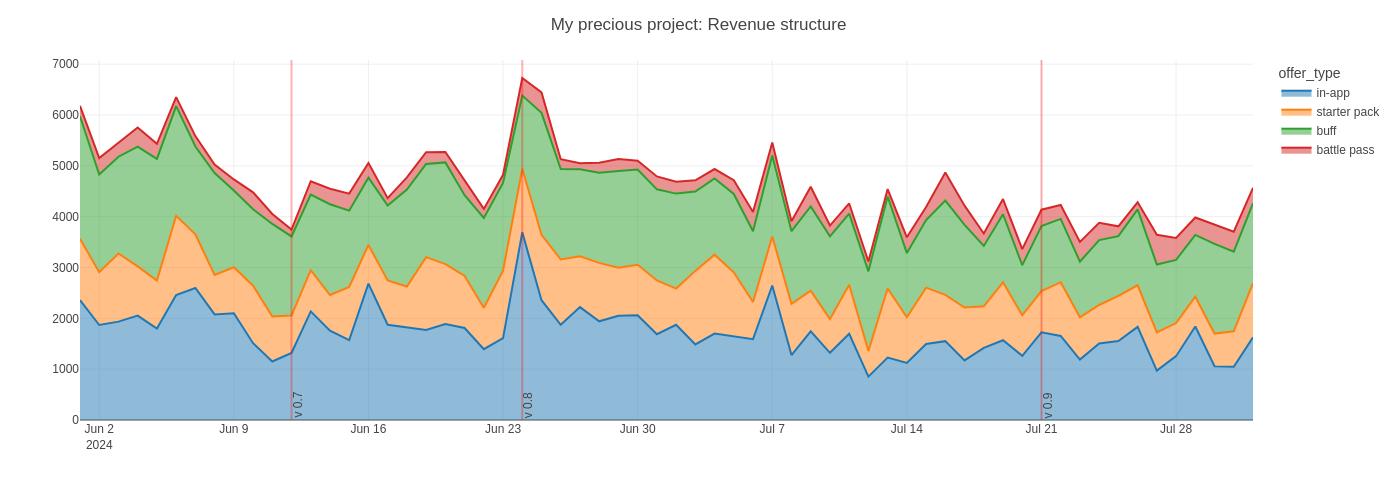

In [251]:
fig = px.area(
    daily_stat, 
    x='login_dt', y='offer_revenue', color='offer_type',
    # https://plotly.com/python/legend/#legend-order
    category_orders={
        'offer_type': ['in-app', 'starter pack', 'buff', 'battle pass'],         
    },    
    # https://plotly.com/python/hover-text-and-formatting/
    hover_name='offer_type',
    hover_data={
        # https://github.com/d3/d3-3.x-api-reference/blob/master/Formatting.md
        'offer_type': False,
        'offer_revenue': ':.0f',
        'revenue_share': ':.1%',                
        'ARPDAU': ':.2f'  
    }
)

for i in versions_dict.keys():
    fig.add_vline(i, line_width=2, line_color='red', opacity=0.3)
    fig.add_annotation(x=i, y=0, yanchor='bottom', text=versions_dict[i], showarrow=False, textangle=-90, xshift=6)  

fig.update_layout(
    title=f'My precious project: Revenue structure',
    xaxis=dict(title=''),
    yaxis=dict(title='', rangemode='tozero'),
    # margin=dict(b=50, l=50),         
    height=500
)

## компоновка

### add_trace

### second y axis

In [255]:
payments_sample_stat_levels = payments_sample.groupby(['level']).agg(
    n_users=('user_id', 'nunique'),
    offer_revenue=('revenue', 'sum')
).reset_index()

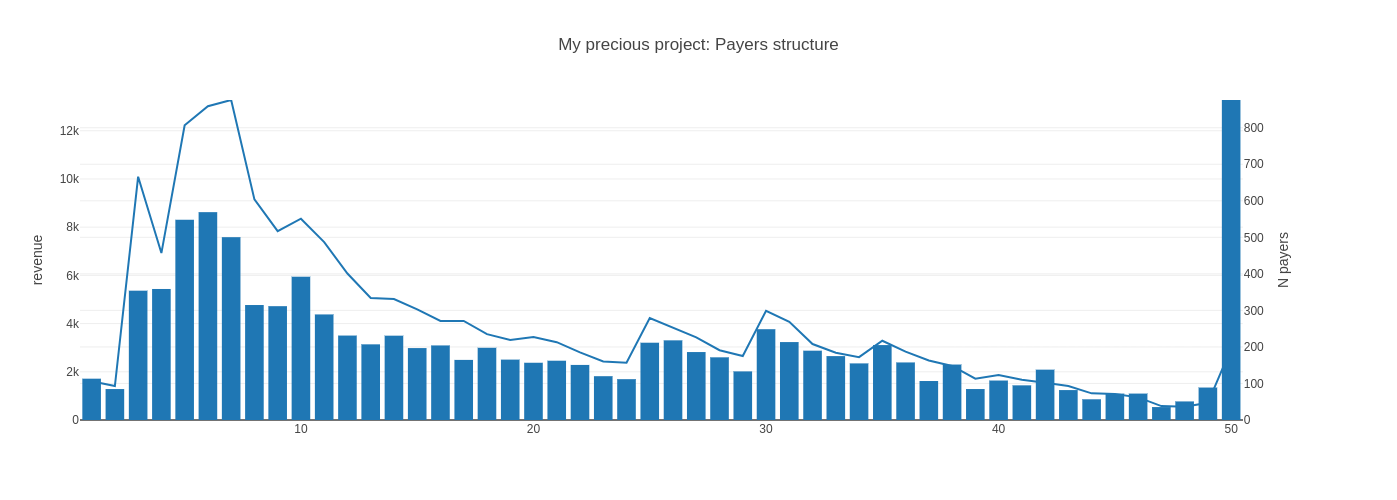

In [265]:
subfig = make_subplots(specs=[[{'secondary_y': True}]])
fig1 = px.bar(payments_sample_stat_levels, x='level', y='offer_revenue')
fig2 = px.line(payments_sample_stat_levels, x='level', y='n_users')
fig2.update_traces(yaxis = 'y2')
subfig.add_traces(fig1.data + fig2.data)
# subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))  

subfig.update_layout(
    title=f'My precious project: Payers structure',
    xaxis=dict(title=''),
    yaxis=dict(title='revenue', range=[0, payments_sample_stat_levels['offer_revenue'].max()]),
    yaxis2=dict(title='N payers', range=[0, payments_sample_stat_levels['n_users'].max()]),    
    # margin=dict(b=50, l=50),         
    height=500
)

### facets

In [301]:
payments_sample_stat_platform = payments_sample.groupby(['pay_dt', 'platform', 'offer_type']).agg(
    offer_revenue=('revenue', 'sum')
).reset_index()
payments_sample_stat_platform['total_revenue'] = payments_sample_stat_platform.groupby(['pay_dt'])['offer_revenue'].transform('sum')
payments_sample_stat_platform['revenue_share'] = payments_sample_stat_platform['offer_revenue'] / payments_sample_stat_platform['total_revenue']

In [312]:
payments_sample_stat_platform.to_csv('payments_platforms.csv', index=False)

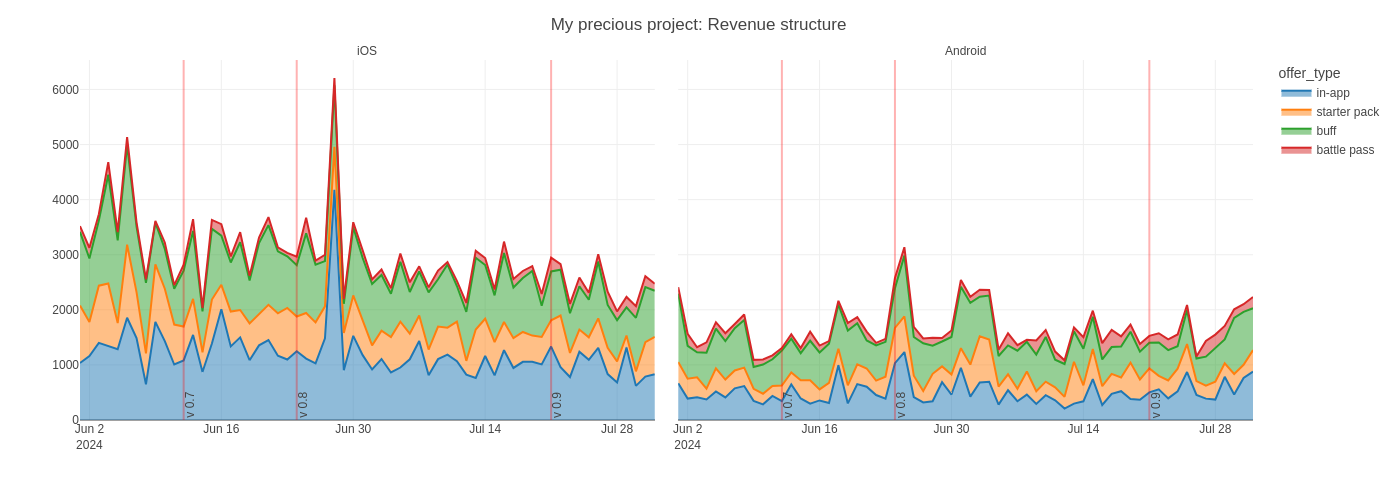

In [311]:
fig = px.area(
    payments_sample_stat_platform, 
    x='pay_dt', y='offer_revenue', color='offer_type', facet_col='platform',
    # сортируем фасеты и категории в легенде
    category_orders={
        'platform': ['iOS', 'Android'],
        'offer_type': ['in-app', 'starter pack', 'buff', 'battle pass'],         
    },    
    # https://plotly.com/python/hover-text-and-formatting/
    hover_name='offer_type',
    hover_data={
        # https://github.com/d3/d3-3.x-api-reference/blob/master/Formatting.md
        'offer_type': False,
        'offer_revenue': ':.0f',
        'total_revenue': ':.0f',
        'revenue_share': ':.1%'
    }
)

# приводим заголовки фасет в приличный вид
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))     

# если надо, чтобы для каждой фасеты была своя ось y
# fig.update_yaxes(matches=None)

# убираем названия оси OX для всех фасет
for axis in fig.layout:
    if type(fig.layout[axis]) == go.layout.XAxis:
        fig.layout[axis].title.text = ''    

# вертикальные линии и подписи
for i in versions_dict.keys():
    fig.add_vline(i, line_width=2, line_color='red', opacity=0.3)
    fig.add_annotation(x=i, xref='x', y=0, yanchor='bottom', text=versions_dict[i], showarrow=False, textangle=-90, xshift=6)
    fig.add_annotation(x=i, xref='x2', y=0, yanchor='bottom', text=versions_dict[i], showarrow=False, textangle=-90, xshift=6)
        
fig.update_layout(
    title=f'My precious project: Revenue structure',
    yaxis=dict(title=''),
    height=500
)

### subplots

In [24]:
wg_platform = widgets.Dropdown(
    options=['Android', 'iOS', 'All platforms'],
    value='Android',
    description='Platform:',
)

wg_metric = widgets.Dropdown(
    options=['n_payers', 'revenue'],
    value='revenue',
    description='Metric:',
)

wg_trendline = widgets.Dropdown(
    options=['yes', 'no'],
    value='no',
    description='Add trendline:',
)

def response(wg_1, wg_2):
    if wg_1 == 'All platforms':
        tmp = payments_sample_stat.groupby(['pay_dt'])['n_payers', 'revenue'].sum().reset_index()
        tmp['platform'] = wg_1
    else:
        tmp = payments_sample_stat[payments_sample_stat['platform'] == wg_1]
    tmp['revenue_share'] = tmp['revenue'] / tmp.groupby(['pay_dt'])['revenue'].transform('sum')

    fig = px.area(
        tmp, x='pay_dt', y=wg_2, color='offer_type',
        category_orders={
            'offer_type': ['in-app', 'starter pack', 'buff', 'battle pass', 'premium'],         
        },
        # text='build',
        # hover_name="robot",         
        hover_data={                
            'revenue': ':.2f',
            'revenue_share': ':.2f',            
            'n_payers': True
        }             
    )
    fig.update_layout(
        # showlegend=False,
        title=f'My precious project: {wg_2}, {wg_1}',
        yaxis=dict(title='', rangemode='tozero'),
        height=500
    )    
    fig.show()
    
ui = widgets.HBox([wg_platform, wg_metric])
out = widgets.interactive_output(response, {'wg_1': wg_platform, 'wg_2': wg_metric})
display(ui, out)

Output()

# End